## Importing Required Libraries:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.proportion as pr

## Reading the datasets :

The dataset deals with the small-scale units in the undivided state of Andhra Pradesh, India.

In [ ]:
group_dataset = pd.read_csv(r'C:\Users\Stastical Analysis\datafile.csv')
group_dataset

D:\PYTHON\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Index,SL_NO,ST_CODE,DIST_CODE,TTM_CODE,SECTOR_CODE,VT_CODE,WORKED_FOR_1D,CLOSED_Y,OPER_DUR_MM,...,REPAYMENT_DELAY,DECLINE_IN_GOP,DMD_PROB,WORK_CAP_PROB,RAW_MTRL_PROB,POWER_RPOB,LABOUR_PROB,MKT_PROB,EQUIP_PROB,MGMT_PROB
0,26222,100937,28,12,14,1,13549,1,,12,...,,2,,,,,,,,
1,61229,87025,28,9,42,1,9506,1,,12,...,,2,,,,,,,,
2,16430,88319,28,6,,2,406030,1,,8,...,,1,2,1,2,2,2,2,2,2
3,3829,13193,28,14,22,2,0,1,,12,...,,2,,,,,,,,
4,11926,46792,28,21,54,1,25649,1,,12,...,,1,1,1,2,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40094,40168,28,10,10,1,10218,1,,12,...,,2,,,,,,,,
9996,51911,26012,28,5,,2,,1,,9,...,,2,,,,,,,,
9997,32896,51456,28,7,20,2,407030,1,,12,...,,2,,,,,,,,
9998,51771,54690,28,4,45,1,4989,1,,6,...,,2,2,1,2,2,2,2,2,2


In [ ]:
group_dataset.shape

(10000, 65)

In [ ]:
# We have 10000 records with 65 columns

# Custom function for removing outliers

def outlier_removal(data,col):
    percentile_25 = data[col].quantile(0.25)

    percentile_75 = data[col].quantile(0.75)

    inter_quartile_range = percentile_75 - percentile_25

    upper_limit = percentile_75 + 1.5 * inter_quartile_range
    lower_limit = percentile_25 - 1.5 * inter_quartile_range

    data[data[col] > upper_limit]
    data[data[col] > lower_limit]

    return data[(data[col] < upper_limit) & (data[col] > lower_limit)]

(8382, 65)

### Business question:
Please determine a 95 percent confidence interval for the 'Gross Output - Year 3 (Rs)' to assess the range within which we can reasonably expect the true value of this financial metric.

### Solution strategy:

1. Outlier removal
2. Calculate the mean of the variable
3. Get the z-critical value for 95% confidence interval


In [ ]:
# Removing outliers from variable 'GOP_Year3'
DataSet = outlier_removal(group_dataset,"GOP_Year3")
DataSet.shape

In [ ]:
df = DataSet.isnull().sum()
df

Index          0
SL_NO          0
ST_CODE        0
DIST_CODE      0
TTM_CODE       0
              ..
POWER_RPOB     0
LABOUR_PROB    0
MKT_PROB       0
EQUIP_PROB     0
MGMT_PROB      0
Length: 65, dtype: int64

In [ ]:
#Q1
#calculating mean of GOP_year3
goutput3_mean = round(DataSet['GOP_Year3'].mean())

#Fetching the GOP_Year3 column into an array
goutput_3 = np.array(DataSet['GOP_Year3'])

#Calculating confidence interval for the GOP_Year3 mean at 95% confidence level
confidence_interval = stats.norm.interval(alpha=0.95, loc=goutput3_mean, scale=stats.sem(goutput_3))

#result
print('95% confidence interval for GOP_Year3 is: ', confidence_interval)


95% confidence interval for GOP_Year3 is:  (147061.91730818196, 154676.08269181804)


## Business Question:
Which two performance measures would you recommend for assessing unit performance within the context of our business?  
All subsequent analyses will be based on these metric definitions, influencing our approach to evaluating unit performance.

## Solution:
The two metrics we have considered for defining the performance are:

1. Returns on Investment -ROI i.e. Net Year 3 profit that is divided by the initial investment on plant and machinery.
2. Net Profit per Employee - NP_EMP i.e. Net Year 3 profit that is divided by the Total Employees number

The above metrics help define both elements of investments - Financial and Human Resources.

Below is how we calculate our defined measures here.

<ipython-input-203-22bf38ce736e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSet['ROI'] = DataSet['NET_Year3']/DataSet['ORI_PURC_VAL_PM']
D:\PYTHON\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


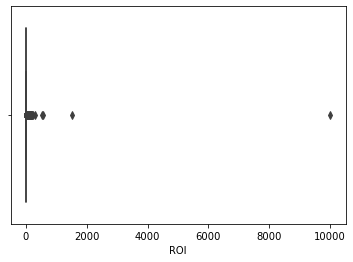

<ipython-input-203-22bf38ce736e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSet['NP_EMP'] = DataSet['NET_Year3'] / DataSet['EMP_TOTAL']


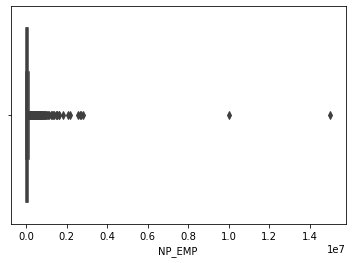

In [ ]:
# Derived Performance metrics:

# 1) Return on Investment measure - Net of Year 3 is divided by the Original Purchase value  plant & machinery
DataSet['ROI'] = DataSet['NET_Year3']/DataSet['ORI_PURC_VAL_PM']
sns.boxplot(DataSet['ROI'])
plt.show()

# 2) Net Profit per Employee
DataSet['NP_EMP'] = DataSet['NET_Year3'] / DataSet['EMP_TOTAL']
sns.boxplot(DataSet['NP_EMP'])
plt.show()

## Business Question:
What is the likelihood that, randomly chosen, a firm belongs to the category of Small Scale and Sustainable Business Enterprises (SSSBE)?

## Solution:

In [ ]:
# unit_type 2 beongs to 'SSSBE'
sssbe_unit = DataSet[DataSet['UNIT_TYPE'] == 2]
print( "Number of SSSBE units are:",len(sssbe_unit))

sssbe_prob = len(sssbe_unit) / len(DataSet)
print('probability that a firm selected at random is a SSSBE unit is ', round(sssbe_prob,2))

Number of SSSBE units are: 2099
probability that a firm selected at random is a SSSBE unit is  0.25


## Business Question:
In our business analysis, we seek to investigate whether the population average of the variable 'Value of Exports for Year 3' is $87,300 or if it deviates significantly from this value.

This inquiry will involve conducting a hypothesis test, where we will clearly define our null hypothesis (H0) and our alternative hypothesis (Ha).

## Solution:

- ### *Null Hypothesis (H0):*
"In our business analysis, we assume that the population average of the variable 'Value of Exports for Year 3' is equal to $87,300."

- ### *Alternative Hypothesis (Ha):*
"We explore the possibility that the population average of the variable 'Value of Exports for Year 3' differs significantly from $87,300, suggesting a meaningful deviation from this value with potential business implications."

## Strategy:
1. We calculate the actual mean of 'Value of Exports for Year 3' from our dataset.
2. Since our calculated mean is significantly higher than the value stated in the null hypothesis, we opt for a right-tailed test.
3. We set our level of confidence at 0.05 (5% significance level).
4. We fetch the 'Value of Exports for Year 3' column into an array for analysis.
5. Using statistical testing, we compute the t-statistic and p-value for the one-sample t-test.

As scipy does not directly support one-sided tests, we divide the p-value by 2 to get the desired result for our right-tailed test.
Finally, we make a decision based on the p-value:
- If p-value < 0.05, we reject the null hypothesis.
- If p-value > 0.05, we accept the null hypothesis.

This analysis will help us determine whether there is strong evidence to conclude that the population mean for 'Value of Exports for Year 3' differs significantly from the specified value of $87,300, which can have important business implications.

In [ ]:
#Null Hypothesis:
#population average of "Value of Exports for Year 3"
#=> µ = 87,300
print("Our Null hypothesis states that population mean 'µ' for 'Value of Exports for Year 3' is",87300)
#finding out actual mean from our dataset
VOEyear3_mean = round(DataSet['VOE_Year3'].mean(),2)
VOEyear3_mean

#Alternate Hypothesis:
#population average of "Value of Exports for Year 3"
#=> µ > 87,300
print("Our Alternate hypothesis states that population mean 'µ' for 'Value of Exports for Year 3' is >",87300)

#choosing the right-tailed test here , as we can clearly see the calculated mean from our dataset
#is way higher than the one stated in our null hypothesis

#Running a one-sided test
#choosing level of confidence as "0.05"

#Fetching the VOE_Year3 column into an array
x = 87300
VOE_3 = np.array(DataSet['VOE_Year3'])

t_stat, pval = stats.ttest_1samp(a = VOE_3, popmean = x)

#As, we dont have any provision to run a 1 sided test directly in package: "scipy",
#we need to divide the p-value by 2 to get our desired result
#as, its a right-tailed test
pval_final = 1- (pval/2)

#results
print('t-statistic is ',t_stat)
print('p-value is ',pval_final)

#decision
if pval_final < 0.05:    # alpha value is 0.05 or 5%
   print("As, p val is < 0.05, we are rejecting the null hypothesis.")
else:
  print("As, p val is > 0.05, we are accepting the null hypothesis.")

Our Null hypothesis states that population mean 'µ' for 'Value of Exports for Year 3' is 87300
Our Alternate hypothesis states that population mean 'µ' for 'Value of Exports for Year 3' is > 87300
t-statistic is  -490.9264918014488
p-value is  1.0
As, p val is > 0.05, we are accepting the null hypothesis.


## Business Question:
In context of business analysis, we need to assess the gender distribution among the leadership of Small Scale and Sustainable Business Enterprises (SSSBEs).

Is there evidence to suggest that a higher proportion of SSSBEs are managed by men rather than women?

## Solution:

- ### *Null Hypothesis (H0):*
"Our analysis assumes that there is no significant difference in the proportion of Small Scale and Sustainable Business Enterprises (SSSBEs) managed by men compared to women. In other words, the proportion of SSSBEs managed by men is equal to or less than the proportion managed by women."

- ### *Alternative Hypothesis (Ha):*
"Our alternative hypothesis posits that a larger proportion of SSSBEs are managed by men as opposed to women. We are testing whether there is a notable difference in the proportions, with men occupying a greater share of management roles within SSSBEs."

## Strategy:
1. Data Selection:
Filtered the dataset to isolate SSSBE units based on 'UNIT_TYPE'

2. Gender-Based Filtering:
Further refining the dataset to identify SSSBE units managed by men, based on 'MAN_BY' criteria.

3. Proportion Calculation:
Calculating the proportion of SSSBE units managed by men and women.

4. Hypotheses Formulation:

- Stated hypotheses:
  - Null Hypothesis (H0): No significant difference in the proportion of SSSBEs managed by men versus women.
  - Alternative Hypothesis (Ha): A larger proportion of SSSBEs are managed by men compared to women.

5. Significance Level Selection:
Chose a significance level (e.g., 0.05) to guide hypothesis testing.

6. Statistical Testing:
Conducting a proportions z-test to assess whether the proportion of SSSBEs managed by men is significantly greater than 50%.

7. Result Interpretation:
- Analyzing the results:
  - If p-value < significance level, rejecting the null hypothesis, indicating a significant gender distribution difference.
  - If p-value > significance level, accepting the null hypothesis, suggesting no strong evidence of gender bias.


In [ ]:
#filtering the dataset for only SSSBE units on column "UNIT_TYPE"

sssbe_unit = DataSet[(DataSet['UNIT_TYPE'] == 2)]
print("number of SSSBE units",len(sssbe_unit))

#filtering again for managed by men
sssbe_men = sssbe_unit[(sssbe_unit['MAN_BY'] == 1)]
print("number of SSSBE units managed by men", len(sssbe_men))
prop_men = round((len(sssbe_men)/len(sssbe_unit)),2)
prop_women = round((1- prop_men),2)
print("So, proportion of SSSBE units managed by men is",prop_men)
print("So, proportion of SSSBE units managed by women is",prop_women)

#Stating our hypothesis

##ALT Hypothesis:
#prop_men > 0.5
print("Our Alternate Hypothesis states that larger proportion of SSSBEs are managed by men as compared to women.")

##NULL Hypothesis:
#prop_men < 0.5 OR prop_men = 0.5
print("Our Null Hypothesis states that larger proportion of SSSBEs are not managed by men as compared to women.")



significance = 0.05
zval, p_value = pr.proportions_ztest(count = prop_men, nobs = len(sssbe_unit), value = 0.5)
print( 'z value is', round(zval,2))
print( 'p-value is', p_value)

#decision
if p_value < significance:    # alpha value is 0.05 or 5%
   print("As, p value is < 0.05, we are rejecting the Null hypothesis","& hence we accept the alternate hypothesis that larger proportion of SSSBEs are managed by men as compared to women.")
else:
  print("As, p value is > 0.05, we are accepting the Null hypothesis","that larger proportion of SSSBEs are not managed by men as compared to women.")

number of SSSBE units 2099
number of SSSBE units managed by men 2037
So, proportion of SSSBE units managed by men is 0.97
So, proportion of SSSBE units managed by women is 0.03
Our Alternate Hypothesis states that larger proportion of SSSBEs are managed by men as compared to women.
Our Null Hypothesis states that larger proportion of SSSBEs are not managed by men as compared to women.
z value is -1064.87
p-value is 0.0
As, p value is < 0.05, we are rejecting the Null hypothesis & hence we accept the alternate hypothesis that larger proportion of SSSBEs are managed by men as compared to women.
